<a href="https://colab.research.google.com/github/run-llama/llama_index/blob/main/docs/docs/examples/embeddings/cohereai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CohereAI Embeddings

Cohere Embed is the first embedding model that natively supports float, int8, binary and ubinary embeddings. 

1. v3 models support all embedding types while v2 models support only `float` embedding type.
2. The default `embedding_type` is `float` with `LlamaIndex`. You can customize it for v3 models using parameter `embedding_type`.

In this notebook, we will demonstrate using `Cohere Embeddings` with different `models`, `input_types` and `embedding_types`.

Refer to their [main blog post](https://txt.cohere.com/int8-binary-embeddings/) for more details on Cohere int8 & binary Embeddings.

If you're opening this Notebook on colab, you will probably need to install LlamaIndex 🦙.

In [ ]:
%pip install llama-index-llms-cohere
%pip install llama-index-embeddings-cohere

In [ ]:
!pip install llama-index

In [ ]:
# Initilise with your api key
import os

cohere_api_key = "YOUR COHERE API KEY"
os.environ["COHERE_API_KEY"] = cohere_api_key

#### With latest `embed-english-v3.0` embeddings.

- input_type="search_document": Use this for texts (documents) you want to store in your vector database

- input_type="search_query": Use this for search queries to find the most relevant documents in your vector database

The default `embedding_type` is `float`.

In [ ]:
from llama_index.embeddings.cohere import CohereEmbedding

# with input_typ='search_query'
embed_model = CohereEmbedding(
    api_key=cohere_api_key,
    model_name="embed-english-v3.0",
    input_type="search_query",
)

embeddings = embed_model.get_text_embedding("Hello CohereAI!")

print(len(embeddings))
print(embeddings[:5])

1024
[-0.041931152, -0.022384644, -0.07067871, -0.011886597, -0.019210815]


In [ ]:
# with input_type = 'search_document'
embed_model = CohereEmbedding(
    api_key=cohere_api_key,
    model_name="embed-english-v3.0",
    input_type="search_document",
)

embeddings = embed_model.get_text_embedding("Hello CohereAI!")

print(len(embeddings))
print(embeddings[:5])

1024
[-0.03074646, -0.0029201508, -0.058044434, -0.015457153, -0.02331543]


##### Let's check With `int8` embedding_type

In [ ]:
embed_model = CohereEmbedding(
    api_key=cohere_api_key,
    model_name="embed-english-v3.0",
    input_type="search_query",
    embedding_type="int8",
)

embeddings = embed_model.get_text_embedding("Hello CohereAI!")

print(len(embeddings))
print(embeddings[:5])

1024
[-54, -29, -90, -16, -25]


##### With `binary` embedding_type

In [ ]:
embed_model = CohereEmbedding(
    api_key=cohere_api_key,
    model_name="embed-english-v3.0",
    input_type="search_query",
    embedding_type="binary",
)

embeddings = embed_model.get_text_embedding("Hello CohereAI!")

print(len(embeddings))
print(embeddings[:5])

128
[-127, -38, 66, 83, 89]


#### With old `embed-english-v2.0` embeddings.

v2 models support by default `float` embedding_type.

In [ ]:
embed_model = CohereEmbedding(
    api_key=cohere_api_key, model_name="embed-english-v2.0"
)

embeddings = embed_model.get_text_embedding("Hello CohereAI!")

print(len(embeddings))
print(embeddings[:5])

4096
[0.65771484, 0.7998047, 2.3769531, -2.3105469, -1.6044922]


#### Now with latest `embed-english-v3.0` embeddings, 

let's use 
1. input_type=`search_document` to build index
2. input_type=`search_query` to retrive relevant context.

We will experiment with `int8` embedding_type.

In [ ]:
import logging
import sys

logging.basicConfig(stream=sys.stdout, level=logging.INFO)
logging.getLogger().addHandler(logging.StreamHandler(stream=sys.stdout))

from llama_index.core import VectorStoreIndex, SimpleDirectoryReader

from llama_index.llms.cohere import Cohere
from llama_index.core.response.notebook_utils import display_source_node

from IPython.display import Markdown, display

INFO:matplotlib.font_manager:generated new fontManager
generated new fontManager


#### Download Data

In [ ]:
!mkdir -p 'data/paul_graham/'
!wget 'https://raw.githubusercontent.com/run-llama/llama_index/main/docs/docs/examples/data/paul_graham/paul_graham_essay.txt' -O 'data/paul_graham/paul_graham_essay.txt'

--2024-03-27 13:02:13--  https://raw.githubusercontent.com/run-llama/llama_index/main/docs/docs/examples/data/paul_graham/paul_graham_essay.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75042 (73K) [text/plain]
Saving to: ‘data/paul_graham/paul_graham_essay.txt’

data/paul_graham/pa 100%[===================>]  73.28K  --.-KB/s    in 0.02s   

2024-03-27 13:02:14 (2.96 MB/s) - ‘data/paul_graham/paul_graham_essay.txt’ saved [75042/75042]



#### Load Data

In [ ]:
documents = SimpleDirectoryReader("./data/paul_graham/").load_data()

### With `int8` embedding_type

#### Build index with input_type = 'search_document'

In [ ]:
llm = Cohere(model="command-nightly", api_key=cohere_api_key)
embed_model = CohereEmbedding(
    api_key=cohere_api_key,
    model_name="embed-english-v3.0",
    input_type="search_document",
    embedding_type="int8",
)

index = VectorStoreIndex.from_documents(
    documents=documents, embed_model=embed_model
)

#### Build retriever with input_type = 'search_query'

In [ ]:
embed_model = CohereEmbedding(
    api_key=cohere_api_key,
    model_name="embed-english-v3.0",
    input_type="search_query",
    embedding_type="int8",
)

search_query_retriever = index.as_retriever()

search_query_retrieved_nodes = search_query_retriever.retrieve(
    "What happened in the summer of 1995?"
)

In [ ]:
for n in search_query_retrieved_nodes:
    display_source_node(n, source_length=2000)

**Node ID:** 0f821a16-5242-4284-86ba-23b16069e071<br>**Similarity:** 0.30740912992211505<br>**Text:** We'd use the building I owned in Cambridge as our headquarters. We'd all have dinner there once a week — on tuesdays, since I was already cooking for the thursday diners on thursdays — and after dinner we'd bring in experts on startups to give talks.

We knew undergrads were deciding then about summer jobs, so in a matter of days we cooked up something we called the Summer Founders Program, and I posted an announcement on my site, inviting undergrads to apply. I had never imagined that writing essays would be a way to get "deal flow," as investors call it, but it turned out to be the perfect source. [15] We got 225 applications for the Summer Founders Program, and we were surprised to find that a lot of them were from people who'd already graduated, or were about to that spring. Already this SFP thing was starting to feel more serious than we'd intended.

We invited about 20 of the 225 groups to interview in person, and from those we picked 8 to fund. They were an impressive group. That first batch included reddit, Justin Kan and Emmett Shear, who went on to found Twitch, Aaron Swartz, who had already helped write the RSS spec and would a few years later become a martyr for open access, and Sam Altman, who would later become the second president of YC. I don't think it was entirely luck that the first batch was so good. You had to be pretty bold to sign up for a weird thing like the Summer Founders Program instead of a summer job at a legit place like Microsoft or Goldman Sachs.

The deal for startups was based on a combination of the deal we did with Julian ($10k for 10%) and what Robert said MIT grad students got for the summer ($6k). We invested $6k per founder, which in the typical two-founder case was $12k, in return for 6%. That had to be fair, because it was twice as good as the deal we ourselves had taken. Plus that first summer, which was really hot, Jessica brought the founders free air conditioners. [16]

Fairly quickly I realized that we had stumbled ...<br>

**Node ID:** 15e1050d-38f1-4c7c-a169-ef9fe4ab1249<br>**Similarity:** 0.3000104724138056<br>**Text:** A company with just a handful of employees would have seemed amateurish. So we didn't reach breakeven until about when Yahoo bought us in the summer of 1998. Which in turn meant we were at the mercy of investors for the entire life of the company. And since both we and our investors were noobs at startups, the result was a mess even by startup standards.

It was a huge relief when Yahoo bought us. In principle our Viaweb stock was valuable. It was a share in a business that was profitable and growing rapidly. But it didn't feel very valuable to me; I had no idea how to value a business, but I was all too keenly aware of the near-death experiences we seemed to have every few months. Nor had I changed my grad student lifestyle significantly since we started. So when Yahoo bought us it felt like going from rags to riches. Since we were going to California, I bought a car, a yellow 1998 VW GTI. I remember thinking that its leather seats alone were by far the most luxurious thing I owned.

The next year, from the summer of 1998 to the summer of 1999, must have been the least productive of my life. I didn't realize it at the time, but I was worn out from the effort and stress of running Viaweb. For a while after I got to California I tried to continue my usual m.o. of programming till 3 in the morning, but fatigue combined with Yahoo's prematurely aged culture and grim cube farm in Santa Clara gradually dragged me down. After a few months it felt disconcertingly like working at Interleaf.

Yahoo had given us a lot of options when they bought us. At the time I thought Yahoo was so overvalued that they'd never be worth anything, but to my astonishment the stock went up 5x in the next year. I hung on till the first chunk of options vested, then in the summer of 1999 I left. It had been so long since I'd painted anything that I'd half forgotten why I was doing this. My brain had been entirely full of software and men's shirts for 4 years. But I had done this to get rich so...<br>

### With `float` embedding_type

#### Build index with input_type = 'search_document'

In [ ]:
llm = Cohere(model="command-nightly", api_key=cohere_api_key)
embed_model = CohereEmbedding(
    api_key=cohere_api_key,
    model_name="embed-english-v3.0",
    input_type="search_document",
    embedding_type="float",
)

index = VectorStoreIndex.from_documents(
    documents=documents, embed_model=embed_model
)

#### Build retriever with input_type = 'search_query'

In [ ]:
embed_model = CohereEmbedding(
    api_key=cohere_api_key,
    model_name="embed-english-v3.0",
    input_type="search_query",
    embedding_type="float",
)

search_query_retriever = index.as_retriever()

search_query_retrieved_nodes = search_query_retriever.retrieve(
    "What happened in the summer of 1995?"
)

In [ ]:
for n in search_query_retrieved_nodes:
    display_source_node(n, source_length=2000)

**Node ID:** cff8a942-2e1a-4921-ac08-8355b49fde85<br>**Similarity:** 0.3051793987443398<br>**Text:** We'd use the building I owned in Cambridge as our headquarters. We'd all have dinner there once a week — on tuesdays, since I was already cooking for the thursday diners on thursdays — and after dinner we'd bring in experts on startups to give talks.

We knew undergrads were deciding then about summer jobs, so in a matter of days we cooked up something we called the Summer Founders Program, and I posted an announcement on my site, inviting undergrads to apply. I had never imagined that writing essays would be a way to get "deal flow," as investors call it, but it turned out to be the perfect source. [15] We got 225 applications for the Summer Founders Program, and we were surprised to find that a lot of them were from people who'd already graduated, or were about to that spring. Already this SFP thing was starting to feel more serious than we'd intended.

We invited about 20 of the 225 groups to interview in person, and from those we picked 8 to fund. They were an impressive group. That first batch included reddit, Justin Kan and Emmett Shear, who went on to found Twitch, Aaron Swartz, who had already helped write the RSS spec and would a few years later become a martyr for open access, and Sam Altman, who would later become the second president of YC. I don't think it was entirely luck that the first batch was so good. You had to be pretty bold to sign up for a weird thing like the Summer Founders Program instead of a summer job at a legit place like Microsoft or Goldman Sachs.

The deal for startups was based on a combination of the deal we did with Julian ($10k for 10%) and what Robert said MIT grad students got for the summer ($6k). We invested $6k per founder, which in the typical two-founder case was $12k, in return for 6%. That had to be fair, because it was twice as good as the deal we ourselves had taken. Plus that first summer, which was really hot, Jessica brought the founders free air conditioners. [16]

Fairly quickly I realized that we had stumbled ...<br>

**Node ID:** 1810afad-3817-447c-a194-859601437923<br>**Similarity:** 0.2959499578848539<br>**Text:** A company with just a handful of employees would have seemed amateurish. So we didn't reach breakeven until about when Yahoo bought us in the summer of 1998. Which in turn meant we were at the mercy of investors for the entire life of the company. And since both we and our investors were noobs at startups, the result was a mess even by startup standards.

It was a huge relief when Yahoo bought us. In principle our Viaweb stock was valuable. It was a share in a business that was profitable and growing rapidly. But it didn't feel very valuable to me; I had no idea how to value a business, but I was all too keenly aware of the near-death experiences we seemed to have every few months. Nor had I changed my grad student lifestyle significantly since we started. So when Yahoo bought us it felt like going from rags to riches. Since we were going to California, I bought a car, a yellow 1998 VW GTI. I remember thinking that its leather seats alone were by far the most luxurious thing I owned.

The next year, from the summer of 1998 to the summer of 1999, must have been the least productive of my life. I didn't realize it at the time, but I was worn out from the effort and stress of running Viaweb. For a while after I got to California I tried to continue my usual m.o. of programming till 3 in the morning, but fatigue combined with Yahoo's prematurely aged culture and grim cube farm in Santa Clara gradually dragged me down. After a few months it felt disconcertingly like working at Interleaf.

Yahoo had given us a lot of options when they bought us. At the time I thought Yahoo was so overvalued that they'd never be worth anything, but to my astonishment the stock went up 5x in the next year. I hung on till the first chunk of options vested, then in the summer of 1999 I left. It had been so long since I'd painted anything that I'd half forgotten why I was doing this. My brain had been entirely full of software and men's shirts for 4 years. But I had done this to get rich so...<br>

### With `binary` embedding_type.

#### Build index with input_type = 'search_document'

In [ ]:
embed_model = CohereEmbedding(
    api_key=cohere_api_key,
    model_name="embed-english-v3.0",
    input_type="search_document",
    embedding_type="binary",
)

index = VectorStoreIndex.from_documents(
    documents=documents, embed_model=embed_model
)

#### Build retriever with input_type = 'search_query'

In [ ]:
embed_model = CohereEmbedding(
    api_key=cohere_api_key,
    model_name="embed-english-v3.0",
    input_type="search_query",
    embedding_type="binary",
)

search_query_retriever = index.as_retriever()

search_query_retrieved_nodes = search_query_retriever.retrieve(
    "What happened in the summer of 1995?"
)

In [ ]:
for n in search_query_retrieved_nodes:
    display_source_node(n, source_length=2000)

**Node ID:** fd8e185d-7c9e-40de-8d3e-09a76ae85e18<br>**Similarity:** 0.3498979255746315<br>**Text:** In its time, the editor was one of the best general-purpose site builders. I kept the code tight and didn't have to integrate with any other software except Robert's and Trevor's, so it was quite fun to work on. If all I'd had to do was work on this software, the next 3 years would have been the easiest of my life. Unfortunately I had to do a lot more, all of it stuff I was worse at than programming, and the next 3 years were instead the most stressful.

There were a lot of startups making ecommerce software in the second half of the 90s. We were determined to be the Microsoft Word, not the Interleaf. Which meant being easy to use and inexpensive. It was lucky for us that we were poor, because that caused us to make Viaweb even more inexpensive than we realized. We charged $100 a month for a small store and $300 a month for a big one. This low price was a big attraction, and a constant thorn in the sides of competitors, but it wasn't because of some clever insight that we set the price low. We had no idea what businesses paid for things. $300 a month seemed like a lot of money to us.

We did a lot of things right by accident like that. For example, we did what's now called "doing things that don't scale," although at the time we would have described it as "being so lame that we're driven to the most desperate measures to get users." The most common of which was building stores for them. This seemed particularly humiliating, since the whole raison d'etre of our software was that people could use it to make their own stores. But anything to get users.

We learned a lot more about retail than we wanted to know. For example, that if you could only have a small image of a man's shirt (and all images were small then by present standards), it was better to have a closeup of the collar than a picture of the whole shirt. The reason I remember learning this was that it meant I had to rescan about 30 images of men's shirts. My first set of scans were so beautiful too.

Thou...<br>

**Node ID:** b013216a-1c23-46b6-ba78-aaeed21b2fe2<br>**Similarity:** 0.3376224194936838<br>**Text:** But about halfway through the summer I realized I really didn't want to run a company — especially not a big one, which it was looking like this would have to be. I'd only started Viaweb because I needed the money. Now that I didn't need money anymore, why was I doing this? If this vision had to be realized as a company, then screw the vision. I'd build a subset that could be done as an open source project.

Much to my surprise, the time I spent working on this stuff was not wasted after all. After we started Y Combinator, I would often encounter startups working on parts of this new architecture, and it was very useful to have spent so much time thinking about it and even trying to write some of it.

The subset I would build as an open source project was the new Lisp, whose parentheses I now wouldn't even have to hide. A lot of Lisp hackers dream of building a new Lisp, partly because one of the distinctive features of the language is that it has dialects, and partly, I think, because we have in our minds a Platonic form of Lisp that all existing dialects fall short of. I certainly did. So at the end of the summer Dan and I switched to working on this new dialect of Lisp, which I called Arc, in a house I bought in Cambridge.

The following spring, lightning struck. I was invited to give a talk at a Lisp conference, so I gave one about how we'd used Lisp at Viaweb. Afterward I put a postscript file of this talk online, on paulgraham.com, which I'd created years before using Viaweb but had never used for anything. In one day it got 30,000 page views. What on earth had happened? The referring urls showed that someone had posted it on Slashdot. [10]

Wow, I thought, there's an audience. If I write something and put it on the web, anyone can read it. That may seem obvious now, but it was surprising then. In the print era there was a narrow channel to readers, guarded by fierce monsters known as editors. The only way to get an audience for anything you wrote was to ge...<br>

##### The retrieved chunks are certainly different with `binary` embedding type compared to `float` and `int8`. It would be interesting to do [retrieval evaluation](https://docs.llamaindex.ai/en/stable/module_guides/evaluating/usage_pattern_retrieval/) for your RAG pipeline in using `float`/`int8`/`binary`/`ubinary` embeddings.

### Text-Image Embeddings

[Cohere now support multi-modal embedding model](https://cohere.com/blog/multimodal-embed-3) where both text and image are in same embedding space.

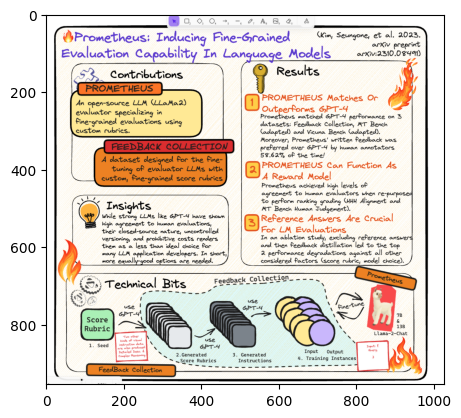

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("../data/images/prometheus_paper_card.png")
plt.imshow(img)

In [ ]:
from llama_index.embeddings.cohere import CohereEmbedding

embed_model = CohereEmbedding(
    api_key=cohere_api_key,
    model_name="embed-english-v3.0",
)

##### Image Embeddings

In [ ]:
embeddings = embed_model.get_image_embedding(
    "../data/images/prometheus_paper_card.png"
)

print(len(embeddings))
print(embeddings[:5])

1024
[0.01171875, -0.014503479, 0.014205933, -0.022949219, -0.040374756]


##### Text Embeddings

In [ ]:
embeddings = embed_model.get_text_embedding("prometheus evaluation model")

print(len(embeddings))
print(embeddings[:5])

1024
[0.0044403076, 0.01737976, -0.023345947, 0.028182983, -0.036499023]
